<a href="https://colab.research.google.com/github/sachatur13/100daysofML/blob/master/Image_Reconstruction_using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip ion

In [83]:
## Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [2]:
## Setting up the training and testing data paths
train_data = '/content/drive/My Drive/Colab Notebooks/Data/lfw/Aaron_Eckhart/'
test_data = '/content/drive/My Drive/Colab Notebooks/Data/lfw/Aaron_Eckhart/'

In [3]:
## Image path setting
image_path = os.listdir(train_data)[0]
test_image_path = os.listdir(test_data)[1]

In [167]:
## Show image file
face = train_data+image_path
test_face = test_data+test_image_path
def read_image_from_path(image_path_train):
    print(image_path_train)
    #print(image_path_test)
    if os.path.isfile(image_path_train):
        faceimage_train = cv2.resize(cv2.imread(image_path_train,flags = 0),(64,64),interpolation = cv2.INTER_AREA)
        #faceimage_test = cv2.imread(image_path_test,flags = 0)
        plt.imshow(cv2.resize(cv2.imread(image_path_train,flags = 0),(64,64),interpolation = cv2.INTER_AREA))
        #plt.imshow(cv2.imread(image_path_test,flags =0),cmap = 'gray')
    else:
        print("File does not exist")
    
    return faceimage_train#,faceimage_test

/content/drive/My Drive/Colab Notebooks/Data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
/content/drive/My Drive/Colab Notebooks/Data/lfw/Aaron_Eckhart/Aaron_Eckhar_0002.jpg


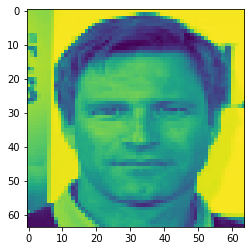

In [168]:

faceimage = read_image_from_path(face);
test_image = read_image_from_path(test_face);

In [169]:
faceimage_scaled = faceimage/255
test_image = test_image/255

In [170]:
test_image.shape

(64, 64)

In [179]:
test_image_ =  test_image.reshape(-1,64,64,1)
faceimage_scaled_ = faceimage_scaled.reshape(-1,64,64,1)

In [120]:

import tensorflow as tf
tf.__version__

'2.2.0'

In [174]:

test_image_.shape

(64, 64)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.callbacks import EarlyStopping

In [145]:
image_encoder = Sequential()
image_encoder.add(Flatten(input_shape = [None,64,64,1]))
image_encoder.add(Dense(4096,activation = 'relu'))
image_encoder.add(Dense(2048,activation = 'relu'))
image_encoder.add(Dense(1024,activation = 'relu'))
image_encoder.add(Dense(512,activation = 'relu'))
image_encoder.add(Dense(256,activation = 'relu'))

In [146]:
image_decoder = Sequential()
image_decoder.add(Dense(512,input_shape = [256],activation = 'relu'))
image_decoder.add(Dense(1024, activation = 'relu'))
image_decoder.add(Dense(2048, activation = 'relu'))
image_decoder.add(Dense(4096, activation = 'relu'))
image_decoder.add(Dense(4096, activation = 'sigmoid'))

image_decoder.add(Reshape([None,64,64,1]))

In [147]:
image_reconstructor = Sequential([image_encoder,image_decoder])

In [148]:
image_encoder.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_85 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dense_86 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_87 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_88 (Dense)             (None, 256)               131328    
Total params: 27,926,272
Trainable params: 27,926,272
Non-trainable params: 0
_________________________________________

In [149]:
image_decoder.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_90 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_91 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_92 (Dense)             (None, 4096)              8392704   
_________________________________________________________________
dense_93 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
reshape_10 (Reshape)         (None, 64, 64)            0         
Total params: 27,930,112
Trainable params: 27,930,112
Non-trainable params: 0
_________________________________________

In [150]:
image_reconstructor.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [151]:

early = EarlyStopping(monitor='val_loss',patience = 0.2)


In [152]:
faceimage_scaled.shape

(64, 128)

In [187]:
image_reconstructor.fit(test_image_,test_image_,epochs = 100,
                        validation_data = (faceimage_scaled_,faceimage_scaled_),callbacks = [early])

Epoch 1/100
1/1 [==============================] - 0s 43ms/step - loss: 2.1763 - val_loss: 0.4880
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 0.8834 - val_loss: 0.5446


In [189]:
generated_image = image_reconstructor.predict(faceimage_scaled_)

original


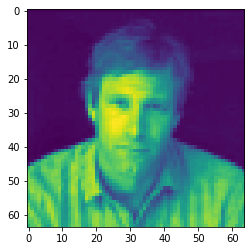

generated


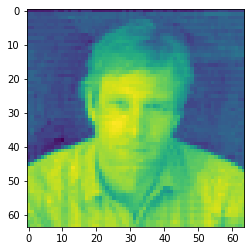

In [192]:
print('original')
plt.imshow(faceimage_scaled_.squeeze())
plt.show()
print('generated')
plt.imshow(generated_image.squeeze())
plt.show()